In [68]:
# all imports
import xmltodict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib.lines import Line2D
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# set default visual parameters
default_params = {
              'font.family': 'Helvetica',
              'axes.labelsize': 20,
              'axes.labelweight': 'bold',  # Make axes labels bold
              'xtick.labelsize': 18,
              'xtick.major.size': 7,
              'xtick.major.width': 2.0,
              'xtick.direction': 'out',
              'font.size': 24,
              'axes.linewidth': 2.0,
              'lines.dashed_pattern': (5, 2.5),
              'lines.markersize': 10,
              'lines.linewidth': 3,
              'lines.markeredgewidth': 1,
              'lines.markeredgecolor': 'k',
              'legend.fontsize': 16,  # Adjust the font size of the legend
              'legend.title_fontsize': 24,  # Increase legend title size if needed
              'legend.frameon': True
    }
plt.rcParams.update(default_params)

# Convert xrdml file to a csv file
def xrdml2csv(xrdml_file, csv_file):

    with open(xrdml_file) as f:
        xrdml = xmltodict.parse(f.read())
    axis_dict = xrdml['xrdMeasurements']['xrdMeasurement']['scan']['dataPoints']['positions'][0]
    assert axis_dict['@axis'] == '2Theta', 'Only 2Theta axis is supported'
    startPos = float(axis_dict['startPosition'])
    endPos = float(axis_dict['endPosition'])

    data = xrdml['xrdMeasurements']['xrdMeasurement']['scan']['dataPoints']['intensities']['#text']
    intensities = np.array(data.split(), dtype=float)
    two_theta = np.linspace(startPos, endPos, len(intensities))

    df = pd.DataFrame({'2Theta': two_theta, 'Intensity': intensities})
    df.to_csv(csv_file, index=False)
    return df

# Can be used to read ASC files as well as txt
def txt2csv(input_file, output_file):
    with open(input_file, 'r') as txt_file:
        lines = txt_file.readlines()
        
    # Assuming the first line is the header
    data_lines = lines[1:]
    
    with open(output_file, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        
        csv_writer.writerow(['2Theta', 'Intensity'])

        for line in data_lines:
            columns = line.strip().split()  # Adjust this if the delimiter is different (e.g., tab or comma)
            csv_writer.writerow([columns[0], columns[1]]) 

txt2csv('/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/Calculated_Profile_240827-VF4_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.ASC','/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/Calculated_Profile_240827-VF4_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv')
txt2csv('/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/Calculated_Profile_240920-VF4_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.ASC','/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/Calculated_Profile_240920-VF4_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv')


In [80]:
# MnF3 Graph

# List of CSV files

def plot_MnF3(ax):


    MnF3_0mins='/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/240918-MnF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
    MnF3_20mins = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/MnF3_1to1_KS6Lgraphite/20mins/240925-MnF3_1to1_KS6Lgraphite-20min_milled-20-70deg_40min.csv'
    MnF3_100mins = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/240920-MnF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

    zero_mins_fit = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/Calculated_Profile_240918-MnF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
    twenty_mins_fit = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/Calculated_Profile_240925-MnF3_1to1_KS6Lgraphite-20min_milled-20-70deg_40min.csv'
    hundred_mins_fit = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/Calculated_Profile_240920-MnF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

    graphite_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/Graphite_ref.csv'
    Mn2F5_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/Mn2F5_ref.csv'
    MnF3_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/MnF3_ref.csv'

    
    csv_files =  [MnF3_0mins, MnF3_20mins, MnF3_100mins, 
                  zero_mins_fit, twenty_mins_fit,hundred_mins_fit,
                  graphite_ref,Mn2F5_ref,MnF3_ref]
    MnF3_vertical_shift = [28000,19200,15000,
                           28000,19200,15000,
                           0,5000,10000]
    linewidth = [4,4,4,
                 1,1,1,
                 None,None,None]
    colors = ['#5A93DB', 'orange', '#49B658',
              'black','black','black',
              'white','black','black']  # Colors for each CSV
    legend_labels = ['Hand mixed', '20 Minutes Milled','100 Minutes Milled',
                     None,None,None,
                     None,None,None]

    # Loop through each CSV and plot
    for i, csv_file in enumerate(csv_files):
        data = pd.read_csv(csv_file)
        
        if csv_file in {MnF3_ref,Mn2F5_ref}:
            ax.bar(data['2Theta'], 30*data['Intensity'], bottom = MnF3_vertical_shift[i],width = 0.25,color=colors[i % len(colors)], label = legend_labels[i])

        else:
            ax.plot(data['2Theta'], MnF3_vertical_shift[i]+data['Intensity'], linestyle='-', linewidth = linewidth[i], color=colors[i], label = legend_labels[i])
    

    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
    legend_labels_for_plot = [label for label in legend_labels if label is not None]

    # Base lines for reference XRD
    ax.axhline(y=5000, c = 'black', linewidth=1)
    ax.axhline(y=10000, c = 'black', linewidth=1)

    #ax.text(52.5,2000,'Graphite ICDD:04-006-5764',family = 'Helvetica', size = 8)
    ax.text(55.5,7000,'Mn$_2$F$_5$ ICDD:04-028-6055',family = 'Helvetica', size = 8)
    ax.text(55.5,12000,'MnF$_3$ ICDD:04-027-1133',family = 'Helvetica', size = 8)

    # Graphite ref
    # ax.plot(26.544, 3800, '*', c='black',markersize = 7)
    ax.plot(26.544, 34000, '*', c='black',markersize = 7)

    # MnF3 ref
    ax.plot(49.216, 11300, 'o', c='black',markersize = 5)
    ax.plot(49.216, 32500, 'o', c='black',markersize = 5)
    ax.plot(53.26, 11500, 'o', c='black',markersize = 5)
    ax.plot(53.26, 31500, 'o', c='black',markersize = 5)
    ax.plot(32.601, 11500, 'o', c='black',markersize = 5)
    ax.plot(32.601, 24600, 'o', c='black',markersize = 5)
    ax.plot(32.601, 32500, 'o', c='black',markersize = 5)
    ax.plot(34.026, 11500, 'o', c='black',markersize = 5)
    ax.plot(34.026, 24600, 'o', c='black',markersize = 5)
    ax.plot(34.026, 33000, 'o', c='black',markersize = 5)
    ax.plot(39.988, 11600, 'o', c='black',markersize = 5)
    ax.plot(39.988, 32500, 'o', c='black',markersize = 5)
    ax.plot(24.034, 14000, 'o', c='black',markersize = 5)
    ax.plot(24.034, 20500, 'o', c='black',markersize = 5)
    ax.plot(24.034, 30700, 'o', c='black',markersize = 5)
    ax.plot(24.034, 47800, 'o', c='black',markersize = 5)


    # Mn2F5 ref
    ax.plot(22.992, 8600, 'v', c='black',markersize = 6)
    ax.plot(22.9923, 20500, 'v', c='black',markersize = 6)
    ax.plot(27.103, 8900, 'v', c='black',markersize = 6)
    ax.plot(27.103, 20000, 'v', c='black',markersize = 6)
    ax.plot(29.028, 7000, 'v', c='black',markersize = 6)
    ax.plot(29.028, 19500, 'v', c='black',markersize = 6)
    ax.plot(46.98, 6500, 'v', c='black',markersize = 6)
    ax.plot(46.98, 18300, 'v', c='black',markersize = 6)



    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
    legend_labels_for_plot = [label for label in legend_labels if label is not None]
    ax.set_yticks([])
    ax.tick_params(axis='x', length=0)
    ax.set_xlabel('Cu Kα 2θ(°)')
    ax.set_ylabel('Intensity (au)')
    #ax.legend(handles=custom_handles, labels=legend_labels_for_plot)
    ax.set_xlim(20, 65)
    ax.grid(True)



In [95]:
# VF4 graph

# raw data

def plot_VF4(ax):

    zero_mins_VF4 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/VF4_1to1_KS6Lgraphite_raw/240827-VF4_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
    hundred_mins_VF4 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/VF4_1to1_KS6Lgraphite_raw/240920-VF4_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

    # fitted data
    fit_0mins_VF4 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/Calculated_Profile_240827-VF4_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
    fit_100mins_VF4 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/Calculated_Profile_240920-VF4_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

    # reference data
    VF3_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/VF3_ref.csv'
    VF4_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/VF4_ref.csv'
    graphite_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/Graphite_ref.csv'

    
    csv_files = [zero_mins_VF4,hundred_mins_VF4, 
                graphite_ref, VF3_ref,VF4_ref, 
                fit_0mins_VF4,fit_100mins_VF4]

    VF4_vertical_shift = [21000,15000,
                    0,5000,10000,
                    21000,15000] # Vertical shift for each data set

    linewidth = [4,4,None,None,None,1,1]

    colors = [ '#5A93DB', '#49B658',
            'black','black','black',
            'black','black']

    legend_labels = ['Hand mixed','Milled 100 minutes',
                    None,None,None,
                    None,None]


    # Loop through each CSV and plot
    for i, csv_file in enumerate(csv_files):
        
        data = pd.read_csv(csv_file)
        print(f'Data from {csv_file}:')
        print(data.head())
        
        if csv_file in {VF3_ref, VF4_ref, graphite_ref}:
            ax.bar(data['2Theta'], 30*data['Intensity'], bottom = VF4_vertical_shift[i], width = 0.25,color=colors[i], label = legend_labels[i])
        else:
            ax.plot(data['2Theta'], VF4_vertical_shift[i]+data['Intensity'],linewidth = linewidth[i],linestyle='-', color=colors[i], label = legend_labels[i])
    
    ax.axhline(y=5000, c = 'black', linewidth=1)
    ax.axhline(y=10000, c = 'black', linewidth=1)
    ax.text(55.5,2000,'Graphite ICDD:04-006-5764',family = 'Helvetica', size = 8)
    ax.text(55.5,7000,'VF$_3$ ICDD:04-005-4224',family = 'Helvetica', size = 8)
    ax.text(55.5,12000,'VF$_4$ ICDD:04-007-1428',family = 'Helvetica', size = 8)

    # Graphite ref
    ax.plot(26.544, 3600, '*', c='black',markersize = 7)
    ax.plot(26.544, 24500, '*', c='black',markersize = 7)

    # VF4 ref
    ax.plot(64.121, 10800, 'o', c='black',markersize = 5)
    ax.plot(64.121, 22400, 'o', c='black',markersize = 5)
    ax.plot(42.62, 11500, 'o', c='black',markersize = 5)
    ax.plot(42.62, 23000, 'o', c='black',markersize = 5)
    ax.plot(38.712, 11500, 'o', c='black',markersize = 5)
    ax.plot(38.712, 23000, 'o', c='black',markersize = 5)
    ax.plot(25.754, 13500, 'o', c='black',markersize = 5)
    ax.plot(25.754, 30000, 'o', c='black',markersize = 5)
    ax.plot(53.152, 11000, 'o', c='black',markersize = 5)
    ax.plot(53.152, 22500, 'o', c='black',markersize = 5)

    # VF3 ref
    ax.plot(23.82, 8500, 'v', c='black',markersize = 6)
    ax.plot(23.82, 23100, 'v', c='black',markersize = 6)
    ax.plot(23.82, 27100, 'v', c='black',markersize = 6)


    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
    legend_labels_for_plot = [label for label in legend_labels if label is not None]

    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
    legend_labels_for_plot = [label for label in legend_labels if label is not None]
    ax.set_yticks([])
    ax.tick_params(axis='x', length=0)
    ax.set_xlabel('Cu Kα 2θ(°)')
    ax.set_ylabel('Intensity (au)')
    # ax.legend(handles=custom_handles, labels=legend_labels_for_plot)
    ax.set_xlim(20, 65)
    ax.grid(True)



In [90]:
# FeF3 graph


def plot_FeF3(ax):

        # Raw data
    zero_min = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/240828-FeF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
    hundred_min = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/240828-FeF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

    # Fitted data

    fit_0mins = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/Calculated_Profile_240828-FeF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
    fit_100mins = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/Calculated_Profile_240828-FeF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

    FeF3_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/FeF3_ref.csv'
    graphite_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/Graphite_ref.csv'


    csv_files = [zero_min,hundred_min,
                fit_0mins,fit_100mins,
                FeF3_ref, graphite_ref]

    colors = ['#5A93DB', '#49B658',
            'black','black',
            'black','white']  # Colors for each CSV

    legend_labels = ['Hand mixed','Milled 100 minutes',None,None,None,None]

    FeF3_vertical_shift =  [17000,10000, 
                    17000,10000,
                    5000,0] # Vertical shift for each data set

    linewidth = [4,4,1,1,None,None]


    for i, csv_file in enumerate(csv_files):
        
        data = pd.read_csv(csv_file)
        print(f'Data from {csv_file}:')
        print(data.head())
        
        if csv_file == FeF3_ref:
            ax.bar(data['2Theta'], 35*data['Intensity'], bottom = FeF3_vertical_shift[i], width = 0.25,color=colors[i], label = legend_labels[i])
        else:
            ax.plot(data['2Theta'], FeF3_vertical_shift[i]+data['Intensity'],linewidth = linewidth[i],linestyle='-', color=colors[i], label = legend_labels[i])
    

    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]  # Creates custom handles for legend
    legend_labels_for_plot = [label for label in legend_labels if label is not None]

    ax.axhline(y=5000, c = 'black', linewidth=1)
    # ax.text(57.5,1500,'Graphite ICDD:04-006-5764',family = 'Helvetica', size = 8)
    ax.text(55.5,6500,'FeF$_3$ ICDD:04-005-4240',family = 'Helvetica', size = 8)

    # graphite
    # ax.plot(26.544, 4400, '*', c='black',markersize = 10)
    ax.plot(26.544, 25000, '*', c='black',markersize = 10)

    
    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
    legend_labels_for_plot = [label for label in legend_labels if label is not None]
    ax.set_yticks([])
    ax.tick_params(axis='x', length=0)
    ax.set_xlabel('Cu Kα 2θ(°)')
    ax.set_ylabel('Intensity (au)')
    #ax.legend(handles=custom_handles, labels=legend_labels_for_plot)
    ax.set_xlim(20, 65)
    ax.grid(True)

   




In [135]:


def plot_CoF3(ax):
    
    # CoF3 Graph

    # List of CSV files

    # Raw data   
    zero_min = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv' 
    twenty_min = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_1to1_KS6Lgraphite/RR_ASC_20mins_CoF3/Re-analyzed_250227_scanned_240925-CoF3_1to1_KS6Lgraphite-20min_milled-20-70deg_40min.csv'
    hundred_min = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

    # Reference peaks
    CoF3_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_ref.csv'
    CoF2_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF2_ref.csv'
    graphite_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/Graphite_ref.csv'

    # Rietveld fits
    fit_100 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_100min_fitted_data.csv'
    fit_20 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/rr_asc_20mins/Calculated_Profile_240925-CoF3_1to1_KS6Lgraphite-20min_milled-20-70deg_40min.csv'
    fit_0 =  '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_1to1_KS6Lgraphite/RR_ASC_0mins_CoF3/Calculated_Profile_240827-CoF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'


    csv_files = [zero_min,twenty_min, hundred_min, 
                CoF3_ref,CoF2_ref, graphite_ref, 
                fit_100, fit_20, fit_0]

    CoF3_vertical_shift = [19000,5000, 9000,
                    5000,0,0,
                    9000,5000,19000] # Vertical shift for each data set
 # Vertical shift for each data set
    print(CoF3_vertical_shift)

    linewidth = [4,4,4,None,None,None,1,1,1]

    colors = [ '#5A93DB', 'orange', '#49B658',
            'black','black','white',
            'black','black','black']

    legend_labels = ['Hand mixed', 'Milled 20 minutes', 'Milled 100 minutes',
                    None,None,None,
                    None,None,None]

    # Loop through each CSV and plot
    for i, csv_file in enumerate(csv_files):
        
        data = pd.read_csv(csv_file)
        print(f'Data from {csv_file}:')
        print(data.head())
        
        if csv_file in {CoF2_ref, CoF3_ref, graphite_ref}:
            ax.bar(data['2Theta'], 30*data['Intensity'], bottom = CoF3_vertical_shift[i], width = 0.25,color=colors[i], label = legend_labels[i])
        else:
            ax.plot(data['2Theta'], CoF3_vertical_shift[i]+data['Intensity'],linewidth = linewidth[i],linestyle='-', color=colors[i], label = legend_labels[i])
    
    ax.axhline(y=5000, c = 'black', linewidth=1)
   # ax.text(57.5,1500,'Graphite ICDD:04-006-5764',family = 'Helvetica', size = 8)
    ax.text(55.5,1500,'CoF$_2$ ICDD:04-005-4250',family = 'Helvetica', size = 8)
    ax.text(55.5,6500,'CoF$_3$ ICDD:04-007-3552',family = 'Helvetica', size = 8)

    # graphite
    # ax.plot(26.544, 3900, '*', c='black',markersize = 10)
    ax.plot(26.544, 28500, '*', c='black',markersize = 10)

    # CoF2
    ax.plot(26.829, 4100, 'v', c='black',markersize = 7)
    ax.plot(39.2, 16000, 'v', c='black',markersize = 7)
    ax.plot(39.2, 1300, 'v', c='black',markersize = 7)
    ax.plot(26.829, 17500, 'v', c='black',markersize = 7)
    ax.plot(52.158, 3000, 'v', c='black',markersize = 7)
    ax.plot(52.158, 16500, 'v', c='black',markersize = 7)
    ax.plot(52.158, 19000, 'v', c='black',markersize = 7)


    # CoF3
    ax.plot(35.52, 6000, 'o', c='black',markersize = 6)
    ax.plot(35.52, 19500, 'o', c='black',markersize = 6)
    ax.plot(35.52, 27000, 'o', c='black',markersize = 6)
    ax.plot(41.23, 6500, 'o', c='black',markersize = 6)
    ax.plot(41.23, 28000, 'o', c='black',markersize = 6)
    ax.plot(41.23, 19500, 'o', c='black',markersize = 6)
    ax.plot(50.05, 19500, 'o', c='black',markersize = 6)
    ax.plot(50.05, 28000, 'o', c='black',markersize = 6)
    ax.plot(50.05, 6200, 'o', c='black',markersize = 6)
    ax.plot(24.412, 39000, 'o', c='black',markersize = 6)
    ax.plot(24.412, 26000, 'o', c='black',markersize = 6)
    ax.plot(24.412, 13800, 'o', c='black',markersize = 6)


    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
    legend_labels_for_plot = [label for label in legend_labels if label is not None]
    ax.set_yticks([])
    ax.tick_params(axis='x', length=0)
    ax.set_xlabel('Cu Kα 2θ(°)')
    ax.set_ylabel('Intensity (au)')
    # ax.legend(handles=custom_handles, labels=legend_labels_for_plot)
    ax.set_xlim(20, 65)
    ax.grid(True)





In [73]:
# plot_CoF3([0,0])
# plot_FeF3([0,0])
# plot_MnF3([0,0])
# plot_VF4([0,0])
#fig2, ax2 = plot_FeF3([0,0])
# fig1, ax1 = plot_CoF3([0,0])
# fig3, ax3 = plot_MnF3([0,0])
# fig4, ax4 = plot_VF4([0,0])

[19000, 5000, 9000, 5000, 0, 0, 9000, 5000, 19000]
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv:
      2Theta  Intensity
0  20.008356     8543.0
1  20.025067     8424.0
2  20.041778     8470.0
3  20.058489     8628.0
4  20.075201     8509.0
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_1to1_KS6Lgraphite/RR_ASC_20mins_CoF3/Re-analyzed_250227_scanned_240925-CoF3_1to1_KS6Lgraphite-20min_milled-20-70deg_40min.csv:
      2Theta     Intensity
0  20.025356  16447.505255
1  20.042356  16590.829326
2  20.059356  16594.407175
3  20.076356  16256.387596
4  20.093356  16519.078440
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv:
      2Theta  Intensity
0  20.008356     7218.0
1  20.025067     7279.0
2  20.041778     7181.0
3  20.0584

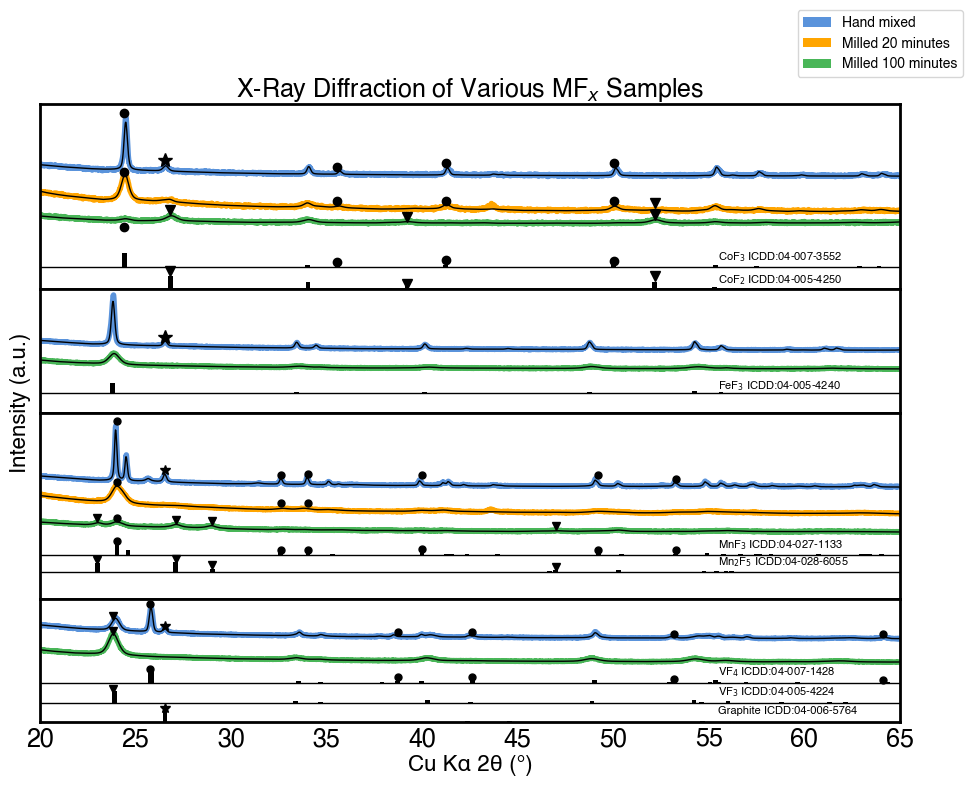

In [138]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch

# Create the figure with tight layout control
fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(
    4, 1,                      # 4 rows, 1 column
    height_ratios=[1.5, 1, 1.5, 1],  # Custom heights
    hspace=0                   # No vertical spacing between plots
)

# Create subplots
axs = [fig.add_subplot(gs[i]) for i in range(4)]

# Plot your data
plot_CoF3(axs[0])
plot_FeF3(axs[1])
plot_MnF3(axs[2])
plot_VF4(axs[3])

# Configure axis visibility and labels
for i, ax in enumerate(axs):
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(axis='x', visible=False)

    if i < len(axs) - 1:
        ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

    if i > 0:
        ax.tick_params(axis='y', which='both', left=False, labelleft=False)

# Shared x and y axis labels
fig.text(0.5, 0.04, 'Cu Kα 2θ (°)', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Intensity (a.u.)', va='center', rotation='vertical', fontsize=16)

# Legend
legend_elements = [
    Patch(facecolor='#5A93DB', label='Hand mixed'),
    Patch(facecolor='orange', label='Milled 20 minutes'),
    Patch(facecolor='#49B658', label='Milled 100 minutes')
]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1,1),
           ncol=1, fontsize=10, frameon=True)

# Super title
fig.suptitle('X-Ray Diffraction of Various MF$_x$ Samples', fontsize=18, y=0.91)

# Final display
plt.tight_layout(rect=[0.02, 0.02, 0.98, 1])  # Control padding
plt.show()

[19000, 5000, 9000, 10000, 5000, 0, 9000, 5000, 19000]
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv:
      2Theta  Intensity
0  20.008356     8543.0
1  20.025067     8424.0
2  20.041778     8470.0
3  20.058489     8628.0
4  20.075201     8509.0
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_1to1_KS6Lgraphite/RR_ASC_20mins_CoF3/Re-analyzed_250227_scanned_240925-CoF3_1to1_KS6Lgraphite-20min_milled-20-70deg_40min.csv:
      2Theta     Intensity
0  20.025356  16447.505255
1  20.042356  16590.829326
2  20.059356  16594.407175
3  20.076356  16256.387596
4  20.093356  16519.078440
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv:
      2Theta  Intensity
0  20.008356     7218.0
1  20.025067     7279.0
2  20.041778     7181.0
3  20.

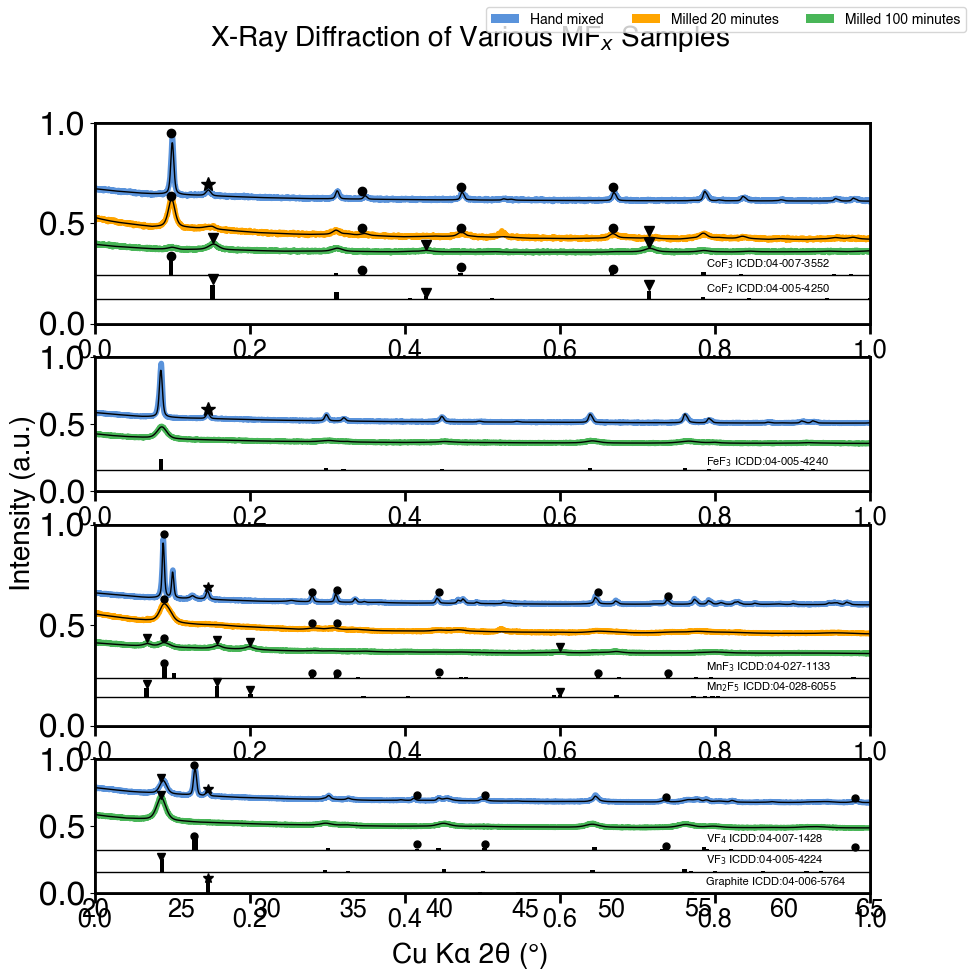

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create the figure and custom GridSpec with variable row heights
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(4, 1, height_ratios=[1.5, 1, 1.5, 1], figure=fig)

# Create axes
axs = [fig.add_subplot(gs[i]) for i in range(4)]

# Add subplots and share axes
ax1 = fig.add_subplot(gs[0], sharex=None)     # top plot
ax2 = fig.add_subplot(gs[1], sharex=ax1)      # shares x with ax1
ax3 = fig.add_subplot(gs[2], sharex=ax1)
ax4 = fig.add_subplot(gs[3], sharex=ax1)

# Plot into each
plot_CoF3(ax1)
plot_FeF3(ax2)
plot_MnF3(ax3)
plot_VF4(ax4)

# Remove x-axis labels except for the bottom plot
for ax in [ax1, ax2, ax3]:
    ax.label_outer()  # hides x ticks and labels if shared
    ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Hide y ticks on interior plots if you want a clean left label only
for ax in [ax2, ax3, ax4]:
    ax.tick_params(axis='y', which='both', left=False, labelleft=False)
   

for ax in [ax1,ax2,ax3,ax4]:
    ax.grid(axis='x', visible=False)
    ax.set_ylabel("")
    ax.set_xlabel("")

# Add shared x and y labels
fig.text(0.04, 0.5, 'Intensity (a.u.)', va='center', rotation='vertical', fontsize=20)
fig.text(0.5, 0.04, 'Cu Kα 2θ (°)', ha='center', fontsize=20)



from matplotlib.patches import Patch

# Define the colors and labels you want
legend_elements = [
    Patch(facecolor='#5A93DB', label='Hand mixed'),
    Patch(facecolor='orange', label='Milled 20 minutes'),
    Patch(facecolor='#49B658', label='Milled 100 minutes')
]

# Add the custom legend to the full figure
fig.legend(handles=legend_elements, loc='upper right', ncol=3, fontsize=10, frameon=True)

# Add a super title
fig.suptitle('X-Ray Diffraction of Various MF$_x$ Samples', fontsize=20)
  # Shrinks top space
plt.show()

In [76]:
# All one plot



CoF3_files = [zero_min,twenty_min, hundred_min, 
                CoF3_ref,CoF2_ref, graphite_ref, 
                fit_100, fit_20, fit_0]

CoF3_offset = [19000,5000, 9000,
                    10000,5000,0,
                    9000,5000,19000] # Vertical shift for each data set
 # Vertical shift for each data set


CoF3_linewidth = [4,4,4,None,None,None,1,1,1]

CoF3_colors = [ '#5A93DB', 'orange', '#49B658',
            'black','black','black',
            'black','black','black']



    csv_files = [zero_min,hundred_min,
                fit_0mins,fit_100mins,
                FeF3_ref, graphite_ref]

    colors = ['orange', '#49B658',
            'black','black',
            'black','black']  # Colors for each CSV

  

    FeF3_vertical_shift =  [17000,10000, 
                    17000,10000,
                    5000,0] # Vertical shift for each data set

    linewidth = [4,4,1,1,None,None]


    csv_files = [zero_mins_VF4,hundred_mins_VF4, 
                graphite_ref, VF3_ref,VF4_ref, 
                fit_0mins_VF4,fit_100mins_VF4]

    VF4_vertical_shift = [21000,15000,
                    0,5000,10000,
                    21000,15000] # Vertical shift for each data set

    linewidth = [4,4,None,None,None,1,1]

    colors = [ '#5A93DB', 'orange',
            'black','black','black',
            'black','black']



    fig, ax = plt.subplots()


    csv_files = [zero_mins_VF4,hundred_mins_VF4, 
                graphite_ref, VF3_ref,VF4_ref, 
                fit_0mins_VF4,fit_100mins_VF4]

    VF4_vertical_shift = [21000,15000,
                    0,5000,10000,
                    21000,15000] # Vertical shift for each data set

    linewidth = [4,4,None,None,None,1,1]

    colors = [ '#5A93DB', 'orange',
            'black','black','black',
            'black','black']


 csv_files =  [MnF3_0mins, MnF3_20mins, MnF3_100mins, 
                  zero_mins_fit, twenty_mins_fit,hundred_mins_fit,
                  graphite_ref,Mn2F5_ref,MnF3_ref]
    MnF3_vertical_shift = [28000,19200,15000,
                           28000,19200,15000,
                           0,5000,10000]
    linewidth = [4,4,4,
                 1,1,1,
                 None,None,None]
    colors = ['#5A93DB', 'orange', '#49B658',
              'black','black','black',
              'black','black','black']  # Colors for each CSV

    legend_labels = ['Hand mixed', '20 Minutes Milled','100 Minutes Milled',
                     None,None,None,
                     None,None,None]

IndentationError: unindent does not match any outer indentation level (<string>, line 74)